# population-zscore
notebook for calculating the z-scores of the posterior samples returned for each hare

In [1]:
#stock imports
import numpy as np
import pandas as pd
import json
import pickle
import scipy
import os
##plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import corner

#.script imports
from scripts import prior_funcs, utils

In [34]:
hare_idx = 0

path = f'form/hare{hare_idx}/obs0/'

with open(path+'samples.pkl', 'rb') as fp:
     samples = pickle.load(fp)

samples = samples['samples']

inputs = ['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age']
samples_df = pd.DataFrame(samples, columns = inputs)

hare_df = pd.read_json(path+'obs0.json')[inputs]

zscore_array = np.ones(5)

array_idx = 0
for label in inputs:
    samples_label = samples_df[label]
    hare_label = hare_df[label]

    samples_std = samples_label.std()
    
    samples_mean = samples_label.mean()

    zscore = (hare_label - samples_mean)/samples_std

    zscore_array[array_idx] = zscore.values[0]

    array_idx+=1

zscore_array

array([-0.70005226, -1.03058899, -0.9266545 , -0.88754039,  0.79206489])

In [49]:
zscore_array=np.empty((0,5))
for hare_idx in range(30):
    path = f'form/hare{hare_idx}/obs0/'
    
    with open(path+'samples.pkl', 'rb') as fp:
         samples = pickle.load(fp)
    
    samples = samples['samples']
    
    inputs = ['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age']
    samples_df = pd.DataFrame(samples, columns = inputs)
    
    hare_df = pd.read_json(path+'obs0.json')[inputs]
    
    zscore_row = np.ones(5)
    
    array_idx = 0
    for label in inputs:
        samples_label = samples_df[label]
        hare_label = hare_df[label]
    
        samples_std = samples_label.std()
        
        samples_mean = samples_label.mean()
    
        zscore = (hare_label - samples_mean)/samples_std
    
        zscore_row[array_idx] = zscore.values[0]
    
        array_idx+=1

    zscore_array = np.vstack([zscore_array, zscore_row])

zscore_df = pd.DataFrame(zscore_array, columns = inputs)

Text(0, 0.5, 'z-score')

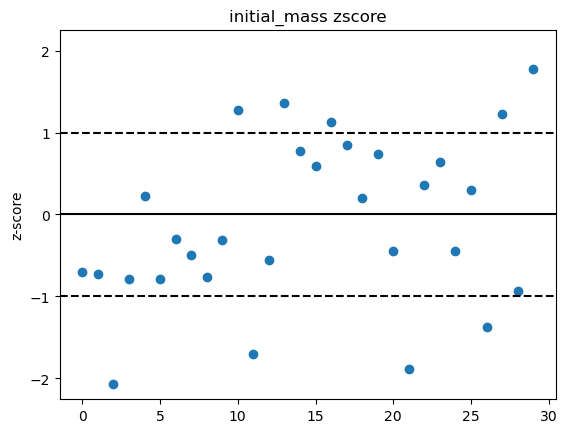

In [68]:
fig, ax = plt.subplots()
ax.scatter(list(zscore_df.index), zscore_df['initial_mass'].values)
ax.axhline(0, c='black')
ax.axhline(-1, c='black', linestyle='--')
ax.axhline(1, c='black', linestyle='--')

yabs_max = abs(max(ax.get_ylim(), key=abs))
ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)

ax.set_title('initial_mass zscore')
ax.set_ylabel('z-score')

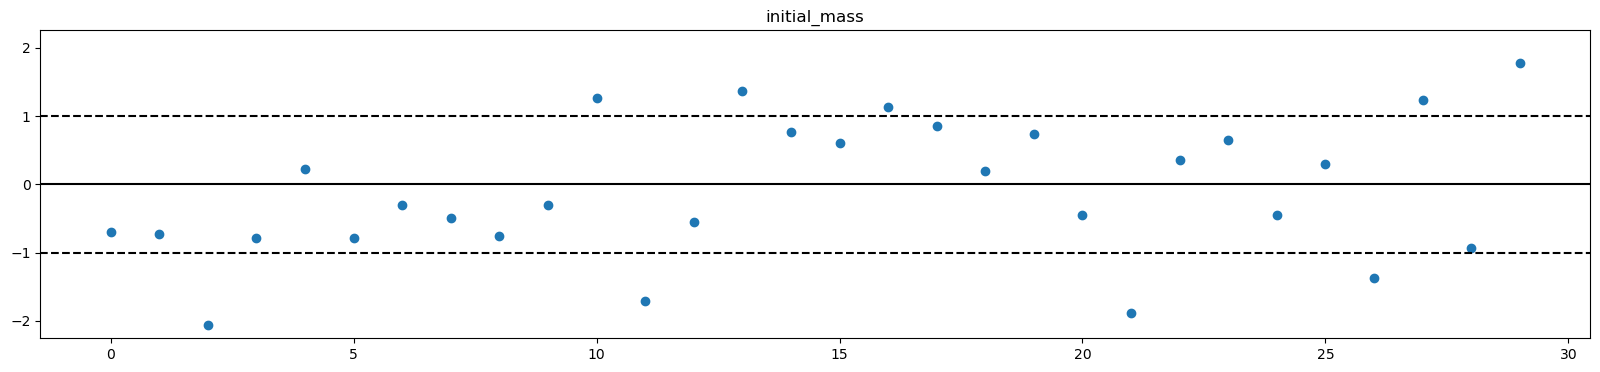

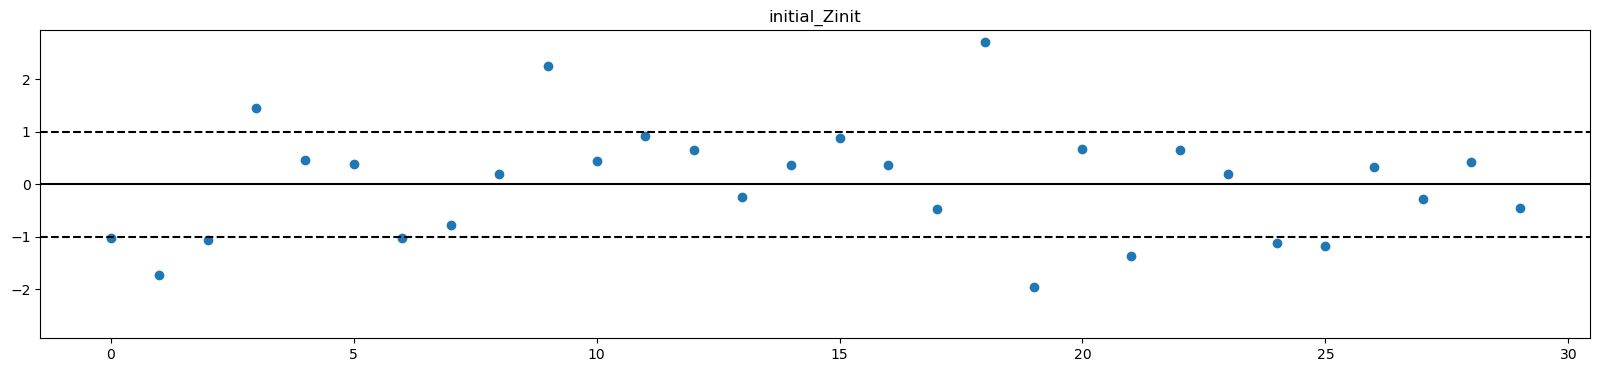

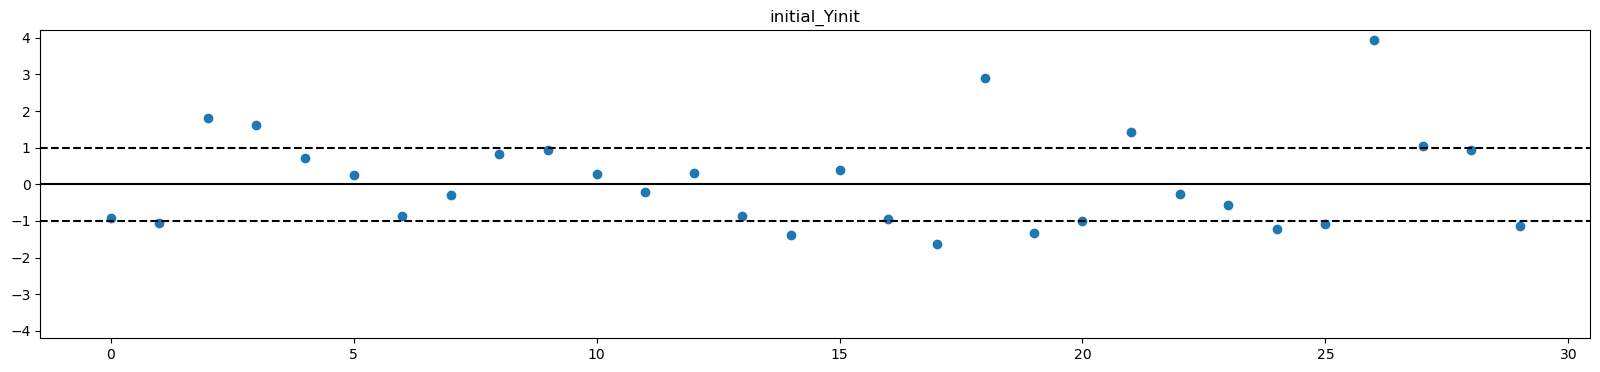

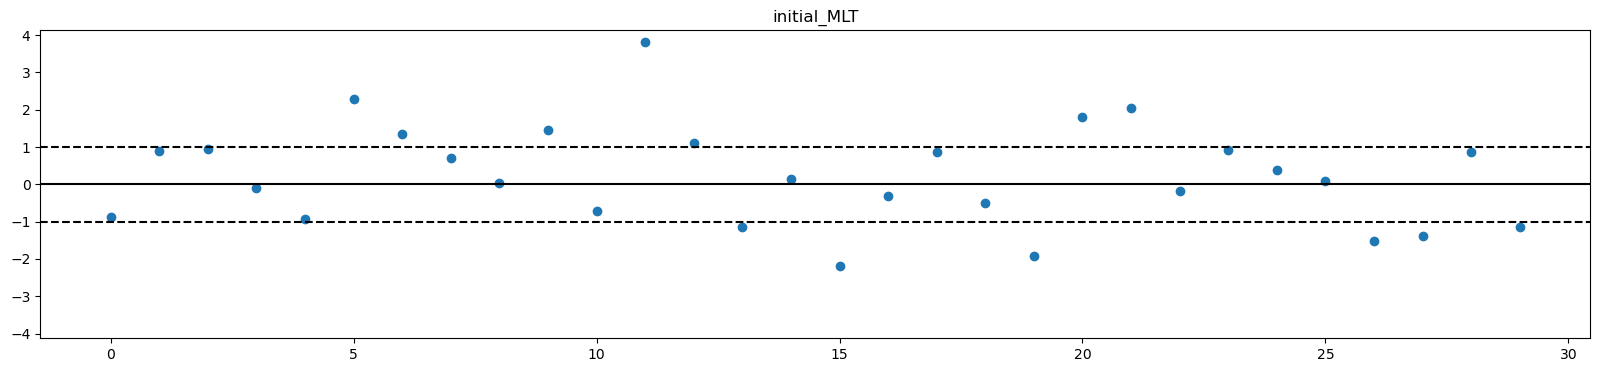

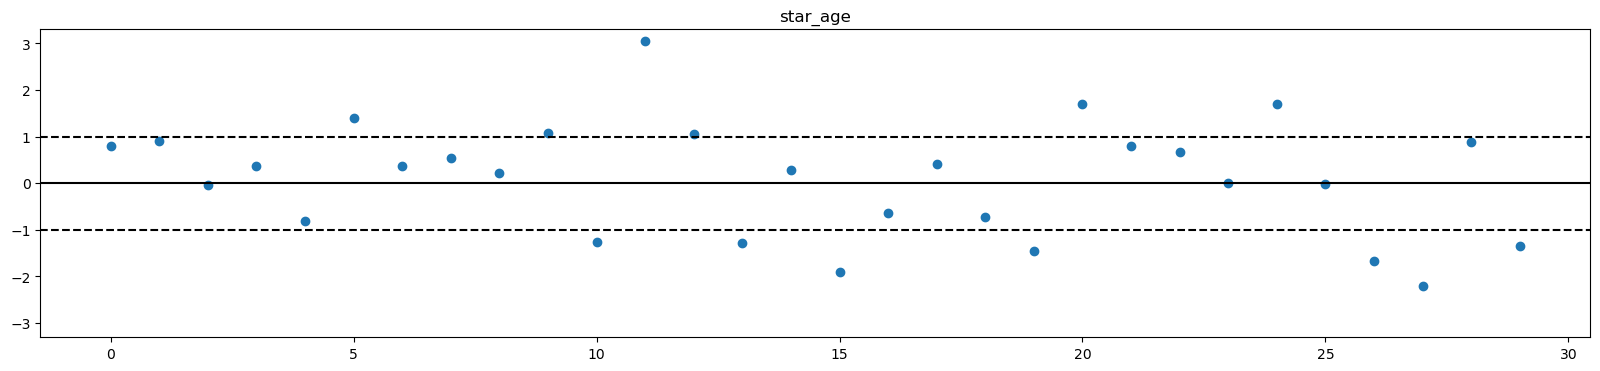

In [74]:
for label in inputs:
    fig, ax = plt.subplots(figsize=(20,4))
    ax.scatter(list(zscore_df.index), zscore_df[label].values)
    ax.axhline(0, c='black')
    ax.axhline(-1, c='black', linestyle='--')
    ax.axhline(1, c='black', linestyle='--')
    
    yabs_max = abs(max(ax.get_ylim(), key=abs))
    ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)
    ax.set_title(label)


In [104]:
zscore_upper_array=np.empty((0,5))
zscore_lower_array=np.empty((0,5))
for hare_idx in range(30):
    path = f'form/hare{hare_idx}/obs0/'
    
    with open(path+'samples.pkl', 'rb') as fp:
         samples = pickle.load(fp)
    
    samples = samples['samples']
    
    inputs = ['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age']
    samples_df = pd.DataFrame(samples, columns = inputs)
    
    hare_df = pd.read_json(path+'obs0.json')[inputs]
    
    zscore_upper_row = np.empty(5)
    zscore_lower_row = np.empty(5)
    
    array_idx = 0
    for label in inputs:
        samples_label = samples_df[label]
        hare_label = hare_df[label]
    
        samples_std = samples_label.std()
        
        zscore_dist = (hare_label.values[0] - samples_label)/samples_std
    
        zscore_upper_row[array_idx] = zscore_dist.mean() + zscore_dist.std()

        zscore_lower_row[array_idx] = zscore_dist.mean() - zscore_dist.std()
    
        array_idx+=1

    zscore_upper_array = np.vstack([zscore_upper_array, zscore_upper_row])
    zscore_lower_array = np.vstack([zscore_lower_array, zscore_lower_row])

zscore_upper_df = pd.DataFrame(zscore_upper_array, columns = inputs)
zscore_lower_df = pd.DataFrame(zscore_lower_array, columns = inputs)

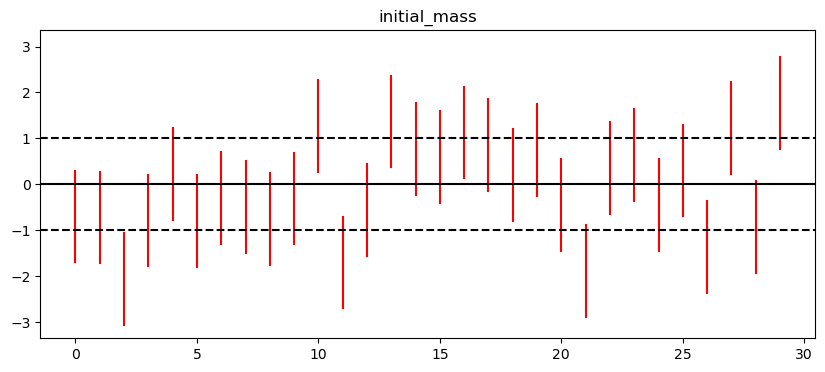

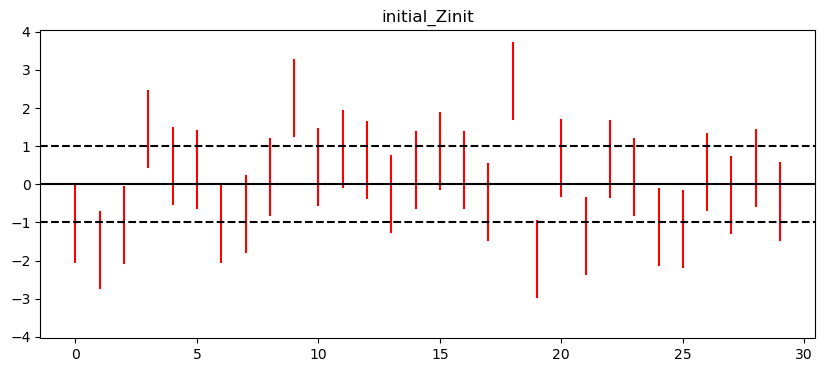

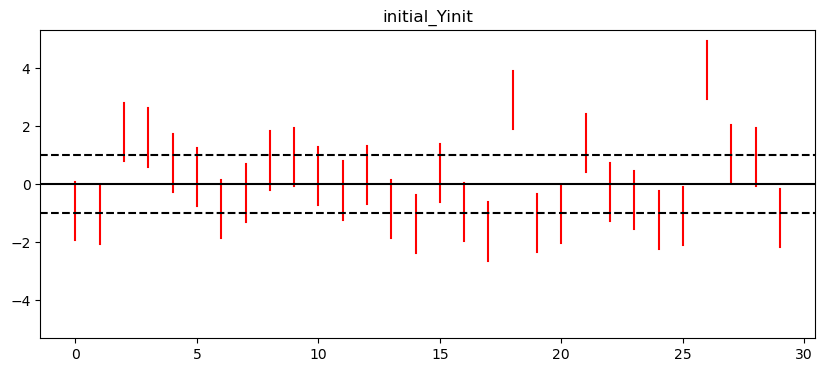

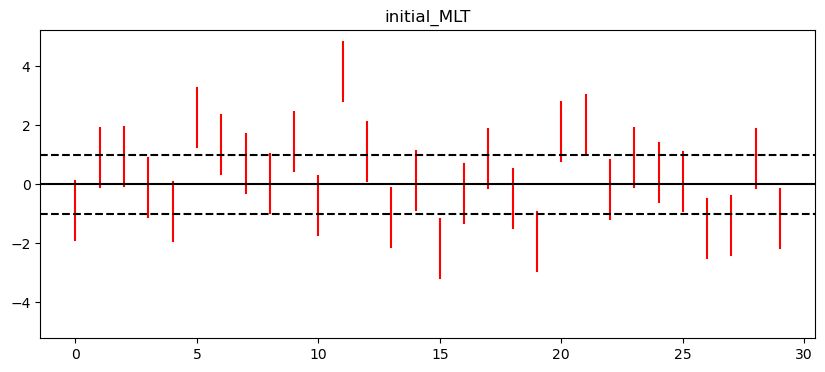

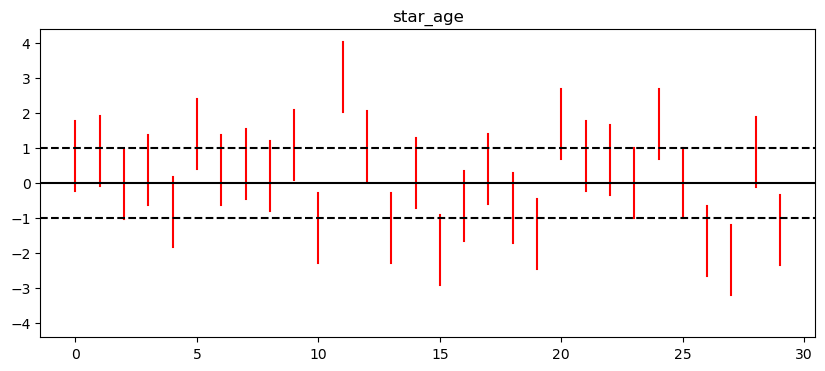

In [126]:
for label in inputs:
    fig, ax = plt.subplots(figsize=(10,4))

    for i in range(30):
        ax.plot(np.full(2, i), np.array([zscore_lower_df[label].values[i], zscore_upper_df[label].values[i]]), c='r')
    ax.axhline(0, c='black')
    ax.axhline(-1, c='black', linestyle='--')
    ax.axhline(1, c='black', linestyle='--')
    
    yabs_max = abs(max(ax.get_ylim(), key=abs))
    ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)
    ax.set_title(label)

In [12]:
zscore_upper_array=np.empty((0,5))
zscore_lower_array=np.empty((0,5))
for hare_idx in range(100):
    path = f'form/hare{hare_idx}/obs0/'
    
    with open(path+'samples.pkl', 'rb') as fp:
         samples = pickle.load(fp)
    
    samples = samples['samples']
    
    inputs = ['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age']
    samples_df = pd.DataFrame(samples, columns = inputs)
    
    hare_df = pd.read_json(path+'obs0.json')[inputs]
    
    zscore_upper_row = np.empty(5)
    zscore_lower_row = np.empty(5)
    
    array_idx = 0
    for label in inputs:
        samples_label = samples_df[label]
        hare_label = hare_df[label]
    
        samples_std = samples_label.std()
        
        zscore_dist = (hare_label.values[0] - samples_label)/samples_std
    
        zscore_upper_row[array_idx] = zscore_dist.mean() + zscore_dist.std()

        zscore_lower_row[array_idx] = zscore_dist.mean() - zscore_dist.std()
    
        array_idx+=1

    zscore_upper_array = np.vstack([zscore_upper_array, zscore_upper_row])
    zscore_lower_array = np.vstack([zscore_lower_array, zscore_lower_row])

zscore_upper_df = pd.DataFrame(zscore_upper_array, columns = inputs)
zscore_lower_df = pd.DataFrame(zscore_lower_array, columns = inputs)

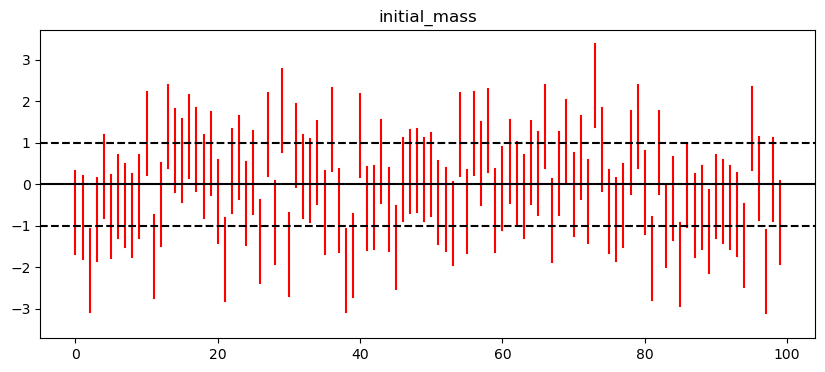

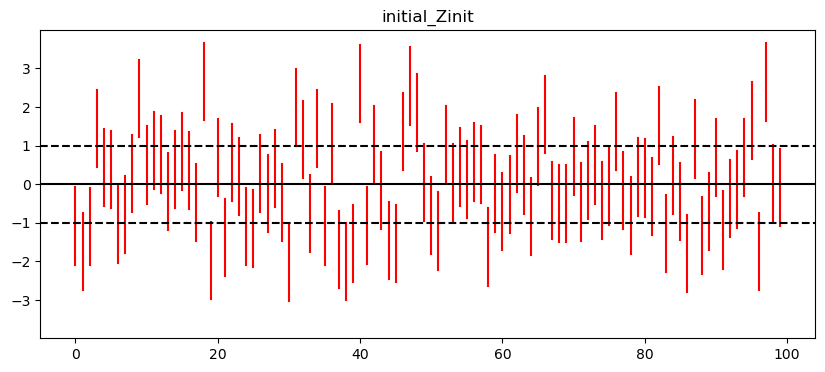

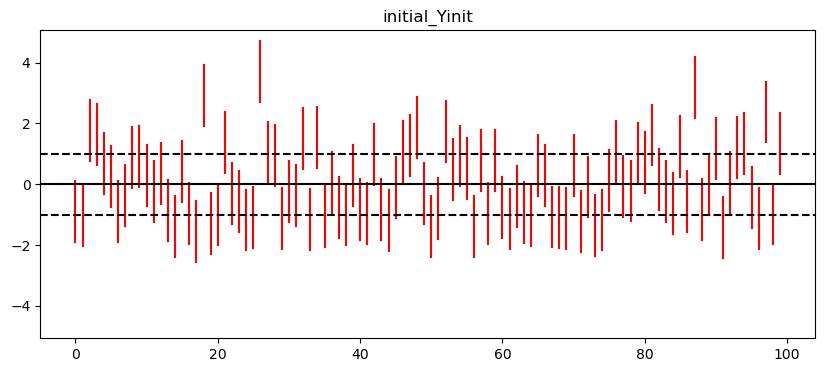

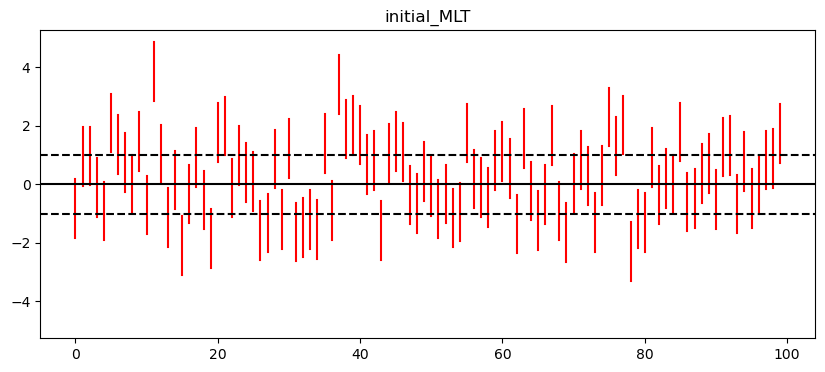

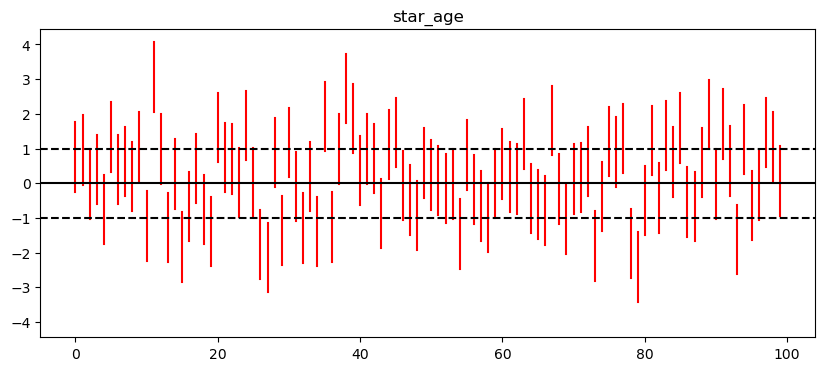

In [13]:
for label in inputs:
    fig, ax = plt.subplots(figsize=(10,4))

    for i in range(100):
        ax.plot(np.full(2, i), np.array([zscore_lower_df[label].values[i], zscore_upper_df[label].values[i]]), c='r')
    ax.axhline(0, c='black')
    ax.axhline(-1, c='black', linestyle='--')
    ax.axhline(1, c='black', linestyle='--')
    
    yabs_max = abs(max(ax.get_ylim(), key=abs))
    ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)
    ax.set_title(label)

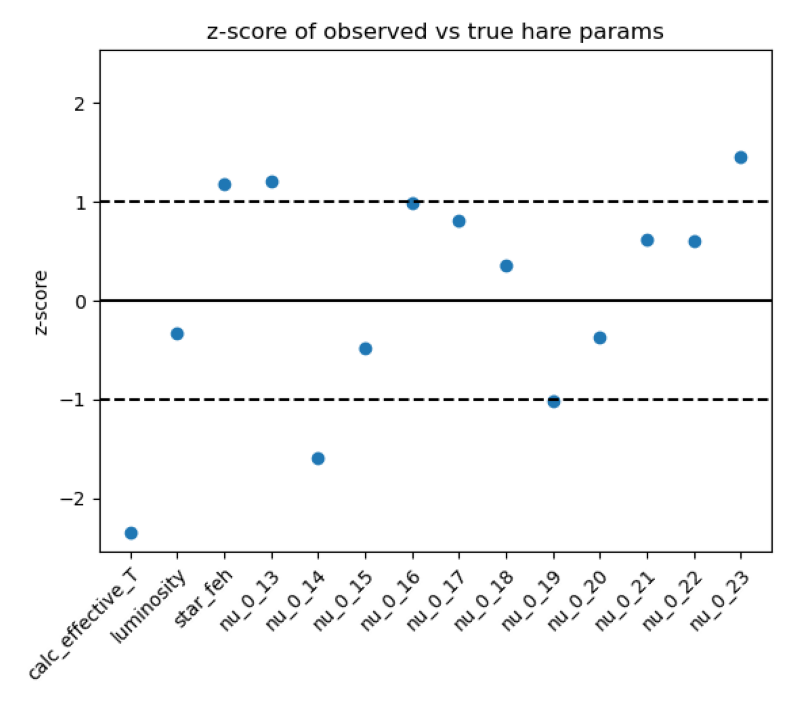

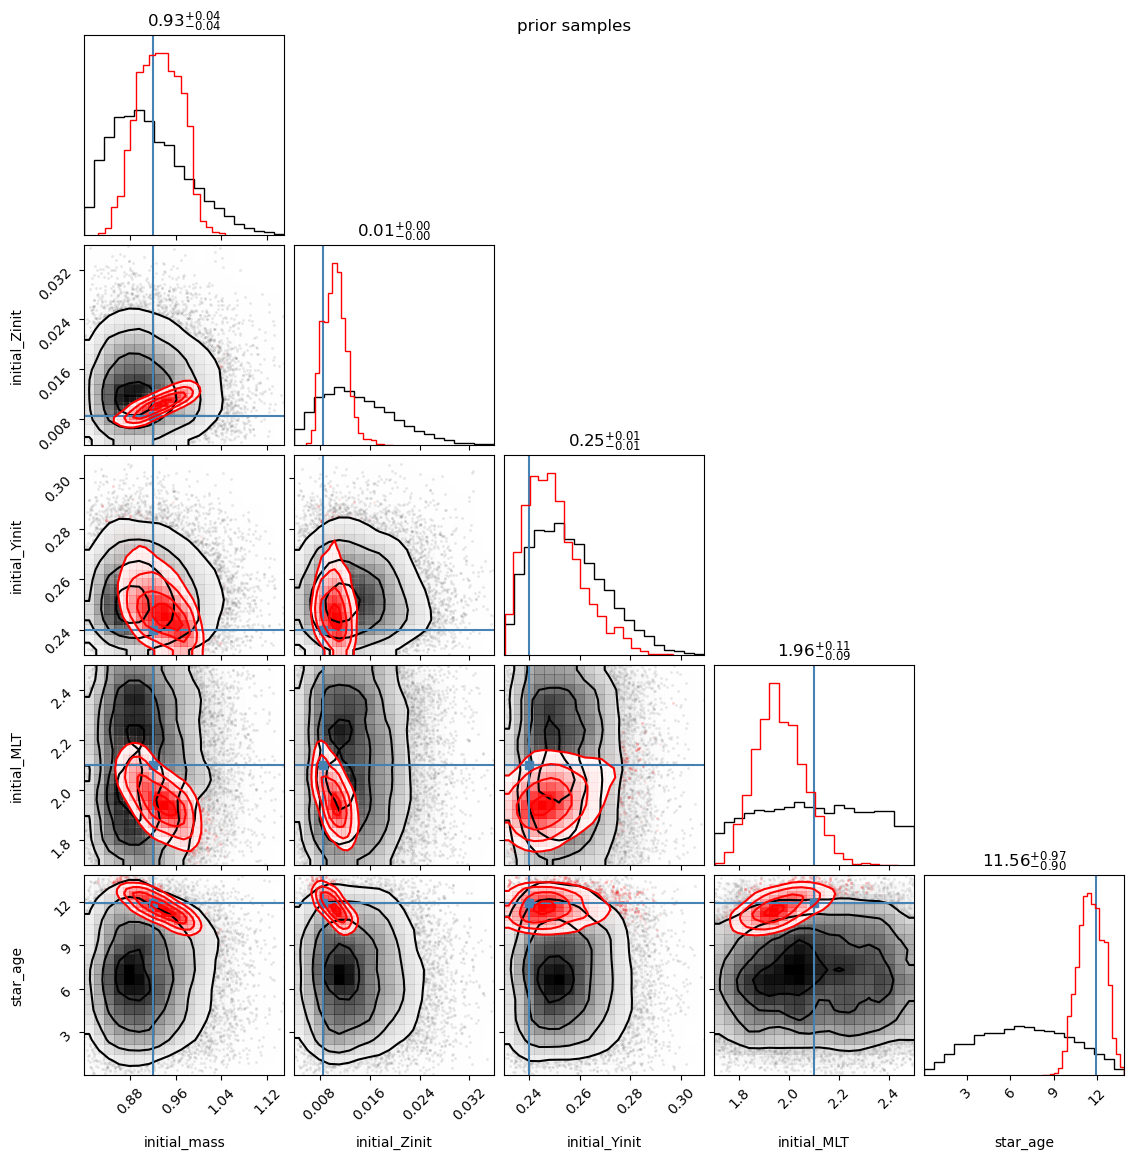

In [21]:
def inspect_hare(hare_idx):
    path = f'form/hare{hare_idx}'
    image = plt.imread(path+'/obs0/zscore_plot.png')

    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(image)
    ax.axis('off')

    labels = ['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age']

    mass_prior = prior_funcs.custom_beta_prior(0.8, 1.2, a=2, b=5)
    
    Zinit_prior = prior_funcs.custom_beta_prior(0.0038, 0.04, a=2, b=5)
    
    Yinit_prior = prior_funcs.custom_beta_prior(0.23, 0.32, a=2, b=5)
    
    MLT_prior = prior_funcs.custom_beta_prior(1.7, 2.5, a=1.2, b=1.2)
    
    age_prior = prior_funcs.custom_beta_prior(0, 14, a=2, b=2)
    
    
    priors = [mass_prior, Zinit_prior, Yinit_prior, MLT_prior, age_prior]

    hare_df = pd.read_json(path+'/obs0/obs0.json')[labels]

    
    with open(path+'/obs0/samples.pkl', 'rb') as fp:
         samples = pickle.load(fp)
    
    size = 10000
    prior_samples = np.array([prior.rvs(size=size) for prior in priors])
    legend_labels = []
    corner_color = 'black'
    figure = corner.corner(prior_samples.T, labels = labels, truths = hare_df.values[0], color=corner_color, hist_kwargs={'density':True}, smooth=True);
    corner.corner(samples['samples'], fig=figure, color='red',hist_kwargs={'density':True}, smooth=True,show_titles=True);
    plt.suptitle('prior samples')
    plt.show()

    
inspect_hare(6)

In [141]:
zscore_array=np.empty((0,5))
for hare_idx in range(30):
    path = f'form/hare{hare_idx}/obs0/'
    
    with open(path+'samples.pkl', 'rb') as fp:
         samples = pickle.load(fp)
    
    samples = samples['samples']
    
    inputs = ['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age']
    samples_df = pd.DataFrame(samples, columns = inputs)
    
    hare_df = pd.read_json(path+'obs0.json')[inputs]
    
    zscore_row = np.ones(5)
    
    array_idx = 0
    for label in inputs:
        samples_label = samples_df[label]
        hare_label = hare_df[label]
    
        samples_std = samples_label.std()
        
        samples_mean = samples_label.mean()
    
        zscore = (hare_label - samples_mean)/samples_std
    
        zscore_row[array_idx] = zscore.values[0]
    
        array_idx+=1

    zscore_array = np.vstack([zscore_array, zscore_row])

zscore_df = pd.DataFrame(zscore_array, columns = inputs)
zscore_df.describe()

,initial_mass,initial_Zinit,initial_Yinit,initial_MLT,star_age
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.096571,0.022029,0.084214,0.228415,0.102996
std,1.010530,1.090132,1.340779,1.357855,1.221591
min,-2.063753,-1.953832,-1.624024,-2.191776,-2.194188
25%,-0.756236,-0.971511,-0.997464,-0.814754,-0.785119
50%,-0.305660,0.263540,-0.242942,0.109947,0.336140
75%,0.716557,0.601782,0.899397,0.960398,0.887068
max,1.770145,2.705568,3.923107,3.825445,3.042236


In [14]:
zscore_array=np.empty((0,5))
for hare_idx in range(100):
    path = f'form/hare{hare_idx}/obs0/'
    
    with open(path+'samples.pkl', 'rb') as fp:
         samples = pickle.load(fp)
    
    samples = samples['samples']
    
    inputs = ['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age']
    samples_df = pd.DataFrame(samples, columns = inputs)
    
    hare_df = pd.read_json(path+'obs0.json')[inputs]
    
    zscore_row = np.ones(5)
    
    array_idx = 0
    for label in inputs:
        samples_label = samples_df[label]
        hare_label = hare_df[label]
    
        samples_std = samples_label.std()
        
        samples_mean = samples_label.mean()
    
        zscore = (hare_label - samples_mean)/samples_std
    
        zscore_row[array_idx] = zscore.values[0]
    
        array_idx+=1

    zscore_array = np.vstack([zscore_array, zscore_row])

zscore_df = pd.DataFrame(zscore_array, columns = inputs)
zscore_df.describe()

,initial_mass,initial_Zinit,initial_Yinit,initial_MLT,star_age
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.119106,0.021447,0.032177,0.213792,0.164294
std,0.961198,1.131959,1.144471,1.233554,1.105870
min,-2.103040,-2.027336,-1.566269,-2.299481,-2.415627
25%,-0.698093,-0.801616,-0.969779,-0.741094,-0.638628
50%,-0.263541,0.028348,-0.223018,0.161599,0.173060
75%,0.559223,0.701636,0.914709,1.077838,0.985727
max,2.385302,2.655370,3.700639,3.849830,3.063564
